In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pylab import mpl
import seaborn as sns
mpl.rcParams['font.sans-serif'] = ['SimHei']
import time
import datetime
%matplotlib inline

In [2]:
card_data=pd.read_csv('E:/BaiduNetdiskDownload/jzzz/train/card_train.txt',header=None)
card_data.columns = ['user_id','consume','place','kind','time','amount','remainder']
card_data.dropna(how='all') #删除value全部为空的行
card_data = card_data.drop_duplicates().reset_index(drop=True)     #去除重复值的行
card_data.head()

,user_id,consume,place,kind,time,amount,remainder
0,1006,POS消费,地点551,淋浴,2013/09/01 00:00:32,0.50,124.90
1,1968,POS消费,地点159,淋浴,2013/09/01 00:00:39,0.10,200.14
2,1406,POS消费,地点660,开水,2013/09/01 00:00:40,0.01,374.42
3,1406,POS消费,地点78,其他,2013/09/01 00:00:40,0.60,373.82
4,13554,POS消费,地点6,淋浴,2013/09/01 00:00:57,0.50,522.37


In [7]:
#card_data.info()

In [8]:
#其他的相关信息
#len(card_data.user_id.unique())
#card_data.consume.unique()
#len(card_data.place.unique())
#card_data.kind.unique()

In [12]:
# 缺失值处理
# 查看缺失值
card_data.isnull().sum()

user_id           0
consume       29925
place        408827
kind         408827
time              0
amount            0
remainder         0
dtype: int64

In [3]:
###拆分一下月份，观察涉及多少天的数据
card_data['date']=card_data['time'].str[0:10] 
card_data.tail()
#card_data.month.unique()  

,user_id,consume,place,kind,time,amount,remainder,date
12089904,21389,POS消费,地点1115,淋浴,2015/08/31 23:58:49,0.3,75.62,2015/08/31
12089905,5499,POS消费,地点2229,淋浴,2015/08/31 23:59:11,0.5,108.69,2015/08/31
12089906,267,POS消费,地点98,淋浴,2015/08/31 23:59:16,0.8,14.08,2015/08/31
12089907,29401,POS消费,地点2073,淋浴,2015/08/31 23:59:26,0.9,8.77,2015/08/31
12089908,27533,POS消费,地点757,淋浴,2015/08/31 23:59:43,0.6,154.35,2015/08/31


In [34]:
month=card_data['date'].str[5:7]
month.unique()

array(['09', '10', '11', '12', '01', '02', '03', '04', '05', '06', '07',
       '08'], dtype=object)

In [4]:
#计算每个学生的在校天数,在之前要以date为单位截取
card_time=card_data[['user_id','date']]
card_time = card_time.drop_duplicates().reset_index(drop=True)
card_time.head()
#card_time.shape

,user_id,date
0,1006,2013/09/01
1,1968,2013/09/01
2,1406,2013/09/01
3,13554,2013/09/01
4,5582,2013/09/01


In [15]:
#对其进行分组计算,用date和消费总额做一个计算
card_time_group=card_time.groupby(['user_id'])['date'].count().reset_index()
card_time_group[:10]

,user_id,date
0,0,186
1,1,140
2,8,281
3,9,271
4,10,209
5,11,238
6,19,104
7,20,161
8,21,61
9,22,283


In [29]:
###判断其消费水平，消费结构以及恩格尔系数

In [5]:
#对user_id和kind进行分组，在对amount进行求和
card_group=card_data.groupby(['user_id','kind'])['amount'].sum()
card_group

user_id  kind
0        图书馆       84.40
         开水       399.65
         文印中心       0.30
         校车       399.20
         淋浴        12.00
         超市       796.78
         食堂       630.81
1        图书馆      270.60
         开水       262.79
         教务处       29.30
         文印中心      96.40
         校车       116.40
         洗衣房       20.58
         淋浴        21.50
         超市       506.60
         食堂      1507.80
8        图书馆      403.30
         开水      2373.02
         文印中心       2.00
         校车      2118.85
         洗衣房        4.50
         淋浴        39.33
         超市        10.00
         食堂       378.15
9        其他        61.13
         图书馆      111.93
         开水      4613.21
         文印中心     294.40
         校车       158.10
         洗衣房       23.82
                  ...   
32666    教务处        5.70
         校车       181.80
         洗衣房       40.92
         淋浴       153.55
         超市      1304.80
         食堂      2791.05
32667    其他        10.00
         图书馆      387.30
         开水

In [6]:
card_group=card_group.unstack('kind')# 调换行列
card_group.fillna(0,inplace=True)    #用0来填补缺失值
card_group.head()
#正常

kind,其他,图书馆,开水,教务处,文印中心,校医院,校车,洗衣房,淋浴,超市,食堂
user_id,,,,,,,,,,,
0,0.00,84.40,399.65,0.0,0.3,0.0,399.20,0.00,12.00,796.78,630.81
1,0.00,270.60,262.79,29.3,96.4,0.0,116.40,20.58,21.50,506.60,1507.80
8,0.00,403.30,2373.02,0.0,2.0,0.0,2118.85,4.50,39.33,10.00,378.15
9,61.13,111.93,4613.21,0.0,294.4,0.0,158.10,23.82,35.96,0.00,1875.60
10,0.00,272.60,736.61,1.3,0.0,0.0,476.40,65.36,139.10,242.80,920.54


In [7]:
card_group['合计']=card_group.sum(axis=1)  # 注意反复运行导致合计累计叠加   ？？
card_group.head()

kind,其他,图书馆,开水,教务处,文印中心,校医院,校车,洗衣房,淋浴,超市,食堂,合计
user_id,,,,,,,,,,,,
0,0.00,84.40,399.65,0.0,0.3,0.0,399.20,0.00,12.00,796.78,630.81,2323.14
1,0.00,270.60,262.79,29.3,96.4,0.0,116.40,20.58,21.50,506.60,1507.80,2831.97
8,0.00,403.30,2373.02,0.0,2.0,0.0,2118.85,4.50,39.33,10.00,378.15,5329.15
9,61.13,111.93,4613.21,0.0,294.4,0.0,158.10,23.82,35.96,0.00,1875.60,7174.15
10,0.00,272.60,736.61,1.3,0.0,0.0,476.40,65.36,139.10,242.80,920.54,2854.71


In [8]:
#计算恩格尔系数
card_group['恩格尔系数']=card_group['食堂']/card_group['合计']  
card_group.head()

kind,其他,图书馆,开水,教务处,文印中心,校医院,校车,洗衣房,淋浴,超市,食堂,合计,恩格尔系数
user_id,,,,,,,,,,,,,
0,0.00,84.40,399.65,0.0,0.3,0.0,399.20,0.00,12.00,796.78,630.81,2323.14,0.271533
1,0.00,270.60,262.79,29.3,96.4,0.0,116.40,20.58,21.50,506.60,1507.80,2831.97,0.532421
8,0.00,403.30,2373.02,0.0,2.0,0.0,2118.85,4.50,39.33,10.00,378.15,5329.15,0.070959
9,61.13,111.93,4613.21,0.0,294.4,0.0,158.10,23.82,35.96,0.00,1875.60,7174.15,0.261439
10,0.00,272.60,736.61,1.3,0.0,0.0,476.40,65.36,139.10,242.80,920.54,2854.71,0.322464


In [9]:
card_group.shape

(10846, 13)

In [10]:
#一些特征值
#card_group['合计'].describe()
card_group['恩格尔系数'].describe()

count    10846.000000
mean         0.450758
std          0.186021
min          0.000000
25%          0.343901
50%          0.478707
75%          0.568171
max          1.000000
Name: 恩格尔系数, dtype: float64

In [11]:
card_group1=card_group[['食堂','合计','恩格尔系数']]
card_group1.head()

kind,食堂,合计,恩格尔系数
user_id,,,
0,630.81,2323.14,0.271533
1,1507.80,2831.97,0.532421
8,378.15,5329.15,0.070959
9,1875.60,7174.15,0.261439
10,920.54,2854.71,0.322464


In [16]:
#合并表格
card_group2=pd.merge(card_group1,card_time_group,how='inner',on='user_id')
card_group2.head()

,user_id,食堂,合计,恩格尔系数,date
0,0,630.81,2323.14,0.271533,186
1,1,1507.80,2831.97,0.532421,140
2,8,378.15,5329.15,0.070959,281
3,9,1875.60,7174.15,0.261439,271
4,10,920.54,2854.71,0.322464,209


In [17]:
card_group.to_csv('card_train.csv',encoding='gbk')   #保存恩格尔系数

In [18]:
#card_group2[card_group2['date']>=100]
card_group2['daliy_consumption']=card_group2['合计']/card_group2['date']
card_group2=card_group2.round({'恩格尔系数':4,'daliy_consumption':2})
card_group2=card_group2.sort_values(['user_id'])
card_group2.head()

,user_id,食堂,合计,恩格尔系数,date,daliy_consumption
0,0,630.81,2323.14,0.2715,186,12.49
1,1,1507.80,2831.97,0.5324,140,20.23
2,8,378.15,5329.15,0.0710,281,18.96
3,9,1875.60,7174.15,0.2614,271,26.47
4,10,920.54,2854.71,0.3225,209,13.66


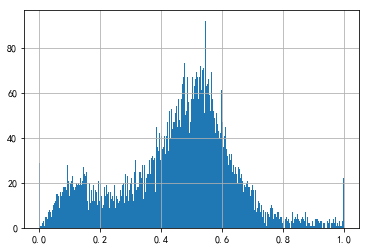

In [19]:
#关于恩格尔系数的直方图
card_group2['恩格尔系数'].hist(bins=500)

In [20]:
subsidy_data=pd.read_table(r'E:/BaiduNetdiskDownload/jzzz/train/subsidy_train.txt', sep = ',',
                          names = ['user_id', 'subsidy'],
                          encoding='utf-8',header=None)
subsidy_data.head()

,user_id,subsidy
0,0,0
1,1,0
2,8,0
3,9,0
4,10,0


In [21]:
consume_subsidy=pd.merge(card_group2,subsidy_data,how='inner',on='user_id') 
consume_subsidy.head()

,user_id,食堂,合计,恩格尔系数,date,daliy_consumption,subsidy
0,0,630.81,2323.14,0.2715,186,12.49,0
1,1,1507.80,2831.97,0.5324,140,20.23,0
2,8,378.15,5329.15,0.0710,281,18.96,0
3,9,1875.60,7174.15,0.2614,271,26.47,0
4,10,920.54,2854.71,0.3225,209,13.66,0


In [22]:
#consume_subsidy1是拿助学金的同学
consume_subsidy1=consume_subsidy[consume_subsidy['subsidy']!=0].reindex().reset_index(drop=True) 
consume_subsidy1.head()
#consume_subsidy1.shape

,user_id,食堂,合计,恩格尔系数,date,daliy_consumption,subsidy
0,22,2959.47,4915.59,0.6021,283,17.37,1000
1,23,3215.75,5297.84,0.6070,267,19.84,1500
2,28,1196.39,3074.71,0.3891,251,12.25,1000
3,64,2538.25,4057.82,0.6255,263,15.43,1500
4,92,1705.14,2921.28,0.5837,249,11.73,1000


In [23]:
#consume_subsidy1是不拿助学金的同学
consume_subsidy2=consume_subsidy[consume_subsidy['subsidy']==0].reset_index(drop=True) 
consume_subsidy2.head()

,user_id,食堂,合计,恩格尔系数,date,daliy_consumption,subsidy
0,0,630.81,2323.14,0.2715,186,12.49,0
1,1,1507.80,2831.97,0.5324,140,20.23,0
2,8,378.15,5329.15,0.0710,281,18.96,0
3,9,1875.60,7174.15,0.2614,271,26.47,0
4,10,920.54,2854.71,0.3225,209,13.66,0


In [24]:
consume_subsidy2.shape

(9286, 7)

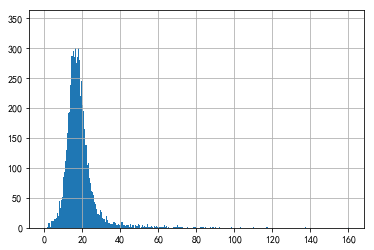

In [25]:
consume_subsidy['daliy_consumption'].hist(bins=500)

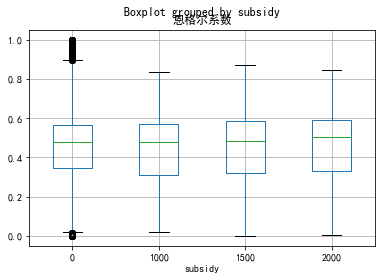

In [26]:
#开始画图对比
consume_subsidy.boxplot(column='恩格尔系数',by='subsidy')
#基本一致

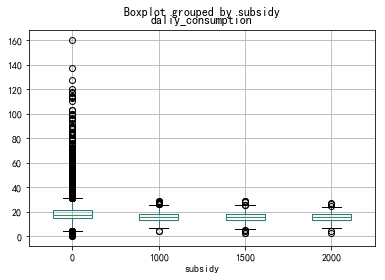

In [27]:
consume_subsidy.boxplot(column='daliy_consumption',by='subsidy')

Text(0,0.5,'人数')

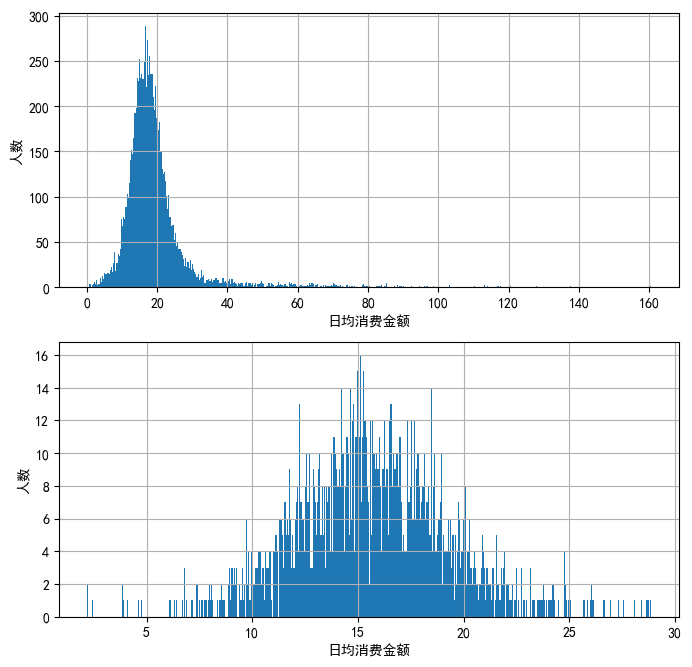

In [28]:
fig = plt.figure(figsize=(8,8),dpi=100)
ax1 =fig.add_subplot(2,1,1)
ax1=consume_subsidy2['daliy_consumption'].hist(bins=500)
plt.xlabel(u'日均消费金额')   
plt.ylabel(u'人数')   
ax2 =fig.add_subplot(2,1,2)
ax2=consume_subsidy1['daliy_consumption'].hist(bins=500)
plt.xlabel(u'日均消费金额')   
plt.ylabel(u'人数')   

In [29]:
#虚假贫困认定???
consume_subsidy1.sort_values('daliy_consumption',ascending=False)[:10]

,user_id,食堂,合计,恩格尔系数,date,daliy_consumption,subsidy
112,1417,3029.18,8370.18,0.3619,290,28.86,1500
1317,16493,4393.55,8380.47,0.5243,292,28.70,1500
111,1416,2566.61,7940.39,0.3232,277,28.67,1000
1060,11142,455.95,7357.71,0.0620,259,28.41,1000
1061,11143,453.80,4912.97,0.0924,175,28.07,1500
1299,16083,3492.85,9065.58,0.3853,329,27.55,1000
1197,14177,2513.03,7676.47,0.3274,281,27.32,2000
34,529,3149.80,7520.99,0.4188,279,26.96,1000
192,2245,4114.25,8441.61,0.4874,317,26.63,1000
20,399,1198.30,8729.70,0.1373,334,26.14,1000


In [30]:
#隐性贫困认定
consume_subsidy3=consume_subsidy2.sort_values('daliy_consumption')
#天数太少不具备有效性,天数越多越具有可靠性
consume_subsidy3=consume_subsidy3[consume_subsidy3['date']>=50][:50]
#consume_subsidy3=consume_subsidy3.sort_values('date',ascending=False)
consume_subsidy3.head()

,user_id,食堂,合计,恩格尔系数,date,daliy_consumption,subsidy
3257,13469,18.40,107.91,0.1705,59,1.83,0
8323,29793,25.10,167.07,0.1502,67,2.49,0
2108,9169,66.53,246.50,0.2699,90,2.74,0
2395,10355,0.00,351.21,0.0000,109,3.22,0
1341,5791,61.20,418.70,0.1462,125,3.35,0


In [31]:
#把消费水平和成绩联系起来

In [32]:
score_data=pd.read_table(r'E:/BaiduNetdiskDownload/jzzz/train/score_train.txt', sep = ',', quotechar =',',
                          names = ['user_id','department','ranking',],
                          encoding='utf-8',header=None)
score_data.head()

,user_id,department,ranking
0,0,9,1
1,1,9,2
2,8,6,1565
3,9,6,1570
4,10,3,1


In [33]:
print(score_data.department.unique())

[ 9  6  3  7  8  5  4  1 19 11 13 16 10 17 15 14  2 18 12]


In [34]:
score_data.shape

(9130, 3)

In [35]:
#按学院划分，并且计算rank_rate

In [36]:
department1=score_data[score_data['department']==1]   
import warnings    
warnings.filterwarnings("ignore") 
department1['ranking_rate']=department1['ranking']/department1.ranking.max()
department1.head()

,user_id,department,ranking,ranking_rate
89,254,1,283,0.769022
90,255,1,284,0.771739
91,258,1,285,0.774457
92,259,1,286,0.777174
93,266,1,291,0.790761


In [37]:
#其余的学院数据,想写一个函数
department2=score_data[score_data['department']==2]   
department2['ranking_rate']=department2['ranking']/department2.ranking.max()
###
department3=score_data[score_data['department']==3]   
department3['ranking_rate']=department3['ranking']/department3.ranking.max()
###
department4=score_data[score_data['department']==4]   
department4['ranking_rate']=department4['ranking']/department4.ranking.max()
###
department5=score_data[score_data['department']==5]   
department5['ranking_rate']=department5['ranking']/department5.ranking.max()
###
department6=score_data[score_data['department']==6]   
department6['ranking_rate']=department6['ranking']/department6.ranking.max()
###
department7=score_data[score_data['department']==7]   
department7['ranking_rate']=department7['ranking']/department7.ranking.max()
###
department8=score_data[score_data['department']==8]   
department8['ranking_rate']=department8['ranking']/department8.ranking.max()
###
department9=score_data[score_data['department']==9]   
department9['ranking_rate']=department9['ranking']/department9.ranking.max()
###
department10=score_data[score_data['department']==10]   
department10['ranking_rate']=department10['ranking']/department10.ranking.max()
###
department11=score_data[score_data['department']==11]   
department11['ranking_rate']=department11['ranking']/department11.ranking.max()
###
department12=score_data[score_data['department']==12]   
department12['ranking_rate']=department12['ranking']/department12.ranking.max()
###
department13=score_data[score_data['department']==13]   
department13['ranking_rate']=department13['ranking']/department13.ranking.max()
###
department14=score_data[score_data['department']==14]   
department14['ranking_rate']=department14['ranking']/department14.ranking.max()
###
department15=score_data[score_data['department']==15]   
department15['ranking_rate']=department15['ranking']/department15.ranking.max()
###
department16=score_data[score_data['department']==16]   
department16['ranking_rate']=department16['ranking']/department16.ranking.max()
###
department17=score_data[score_data['department']==17]   
department17['ranking_rate']=department17['ranking']/department17.ranking.max()
###
department18=score_data[score_data['department']==18]   
department18['ranking_rate']=department18['ranking']/department18.ranking.max()
###
department19=score_data[score_data['department']==19]   
department19['ranking_rate']=department19['ranking']/department19.ranking.max()

In [38]:
frames=[department1,department2,department3,department4,department5,department6,department7,department8,department9,
        department10,department11,department12,department13,department14,department15,department16,department17,department18,department19]
score_ranking=pd.concat(frames)
score_ranking.head()

,user_id,department,ranking,ranking_rate
89,254,1,283,0.769022
90,255,1,284,0.771739
91,258,1,285,0.774457
92,259,1,286,0.777174
93,266,1,291,0.790761


In [39]:
consume_subsidy_ranking=pd.merge(consume_subsidy,score_ranking,how='inner',on='user_id')
consume_subsidy_ranking1=pd.merge(consume_subsidy1,score_ranking,how='inner',on='user_id')
consume_subsidy_ranking2=pd.merge(consume_subsidy2,score_ranking,how='inner',on='user_id')
consume_subsidy_ranking.head()

,user_id,食堂,合计,恩格尔系数,date,daliy_consumption,subsidy,department,ranking,ranking_rate
0,0,630.81,2323.14,0.2715,186,12.49,0,9,1,0.000341
1,1,1507.80,2831.97,0.5324,140,20.23,0,9,2,0.000682
2,8,378.15,5329.15,0.0710,281,18.96,0,6,1565,0.996815
3,9,1875.60,7174.15,0.2614,271,26.47,0,6,1570,1.000000
4,10,920.54,2854.71,0.3225,209,13.66,0,3,1,0.000439


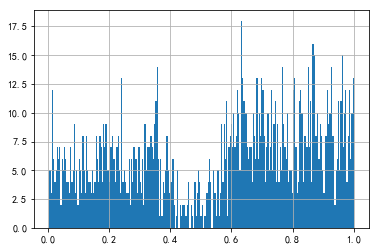

In [40]:
consume_subsidy_ranking1['ranking_rate'].hist(bins=250)

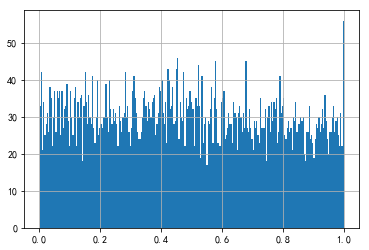

In [41]:
consume_subsidy_ranking2['ranking_rate'].hist(bins=250)

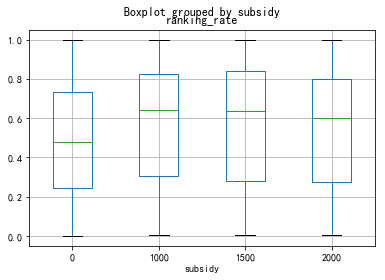

In [42]:
consume_subsidy_ranking.boxplot(column='ranking_rate',by='subsidy')
#领取subsidy的同学成绩相对好一些

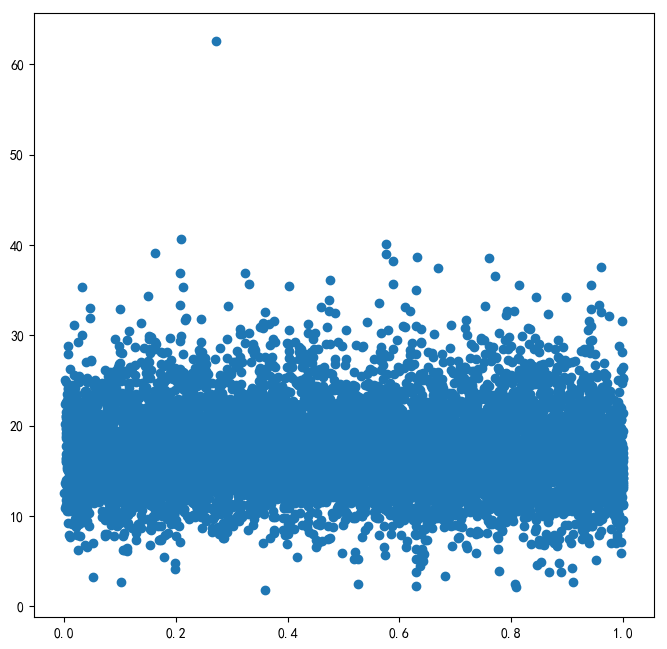

In [43]:
#消费水平和成绩之间的关系
fig=plt.figure(figsize=(8,8),dpi=100)
plt.scatter(consume_subsidy_ranking['ranking_rate'],consume_subsidy_ranking['daliy_consumption'])